Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin 
edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli 
geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını 
gerçekleştirmeniz beklenmektedir. 

* Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki
Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde
yapılan diyabet araştırması için kullanılan verilerdir.
Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir
*  9 Değişken -- 768 Gözlem -- 24 KB


 Pregnancies: Hamilelik sayısı

Glucose: Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu

Blood Pressure: Kan Basıncı (Küçük tansiyon) (mm Hg)

SkinThickness: Cilt Kalınlığı

Insulin 2 saatlik serum insülini (mu U/ml)

DiabetesPedigreeFunction Fonksiyon (Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu)

BMI Vücut kitle endeksi

Age Yaş (yıl)

Outcome Hastalığa sahip (1) ya da değil (0)












In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()
import io
data = io.BytesIO(uploaded['diabetes.csv'])

Saving diabetes.csv to diabetes.csv


In [3]:
df=pd.read_csv(data)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
cat_cols=[col for col in df.columns if df[col].nunique()<10 and df[col].dtypes in ["int", "float"]]
cat_cols

['Outcome']

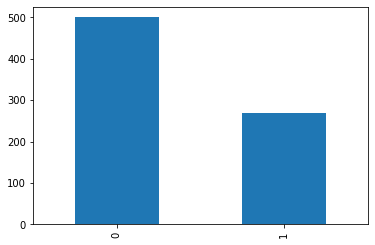

In [8]:
df["Outcome"].value_counts().plot(kind="bar")
plt.show()

In [9]:
num_cols=[col for col in df.columns if df[col].nunique()>10 and df[col].dtypes in ["int", "float"]]
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [11]:
df.groupby("Outcome").agg({"Age": ["sum","count","mean"],
                          "Pregnancies": ["sum","count","mean"],
                           "Glucose": ["sum","count","mean"],
                           "BloodPressure": ["sum","count","mean"],
                           "SkinThickness": ["sum","count","mean"],
                           "Insulin": ["sum","count","mean"],
                           "BMI": ["sum","count","mean"],
                           "DiabetesPedigreeFunction": ["sum","count","mean"]}).T

Outcome                                    0             1
Age                      sum    15595.000000   9934.000000
                         count    500.000000    268.000000
                         mean      31.190000     37.067164
Pregnancies              sum     1649.000000   1304.000000
                         count    500.000000    268.000000
                         mean       3.298000      4.865672
Glucose                  sum    54990.000000  37857.000000
                         count    500.000000    268.000000
                         mean     109.980000    141.257463
BloodPressure            sum    34092.000000  18981.000000
                         count    500.000000    268.000000
                         mean      68.184000     70.824627
SkinThickness            sum     9832.000000   5940.000000
                         count    500.000000    268.000000
                         mean      19.664000     22.164179
Insulin                  sum    34396.000000  26890.000000
                         count    500.000000    268.000000
                         mean      68.792000    100.335821
BMI                      sum    15152.100000   9418.200000
                         count    500.000000    268.000000
                         mean      30.304200     35.142537
DiabetesPedigreeFunction sum      214.867000    147.534000
                         count    500.000000    268.000000
                         mean       0.429734      0.550500

In [28]:
def outlier_tresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quantile1=dataframe[col_name].quantile(q1)
  quantile3=dataframe[col_name].quantile(q3)
  Iqr=quantile3-quantile1
  up_limit=quantile3+1.5*Iqr
  low_limit=quantile1-1.5*Iqr
  return low_limit, up_limit

In [22]:
def check_outlier(dataframe,col_name):
  low_limit, up_limit=outlier_tresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name]>up_limit)|(dataframe[col_name]<low_limit)].any(axis=None):
    return True
  else:
    return False


In [23]:
for col in num_cols:
  print(col , check_outlier(df,col))

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
corr=df[num_cols].corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


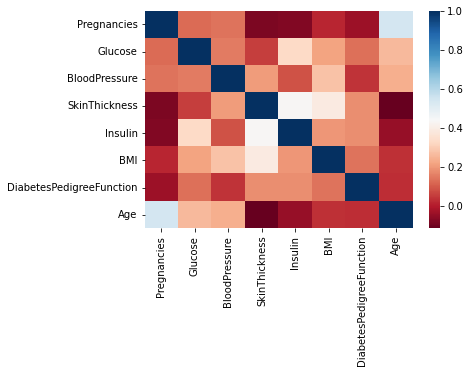

In [17]:
sns.heatmap(corr, cmap="RdBu")
plt.show()

In [36]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [37]:
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [38]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [39]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [40]:
na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [41]:
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [42]:
missing_vs_target(df, "Outcome", na_columns)

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




In [43]:
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [44]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [48]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.765625